# Chance of Admission Prediction

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )<br>
TOEFL Scores ( out of 120 )<br>
University Rating ( out of 5 )<br>
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )<br>
Undergraduate GPA ( out of 10 )<br>
Research Experience ( either 0 or 1 )<br>
Chance of Admit ( ranging from 0 to 1 )<br>

Dataset Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

### In this notebook we go through first the EDA of the data and then with 10 different models of Linear Regression

In [ ]:
# Import the libraries

In [620]:
# import 'Numpy' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['figure.figsize'] = [15,8]

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [166]:
df_admission=pd.read_csv("Admission_Predict.csv",index_col=0)
df_admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis(EDA)

In [167]:
df_admission.shape

(400, 8)

In [168]:
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [169]:
df_admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [170]:
df_admission.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

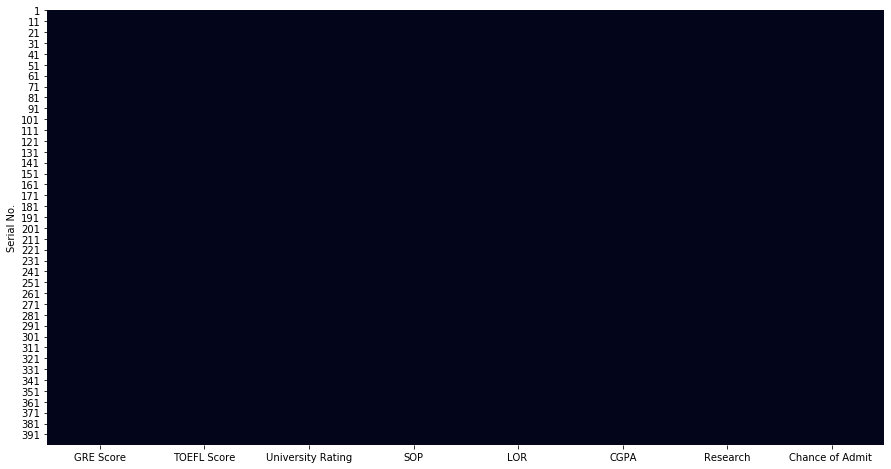

In [171]:
sns.heatmap(df_admission.isnull(), cbar=False)
plt.show()

In [172]:
df_admission_correlation=df_admission.corr()
df_admission_correlation

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


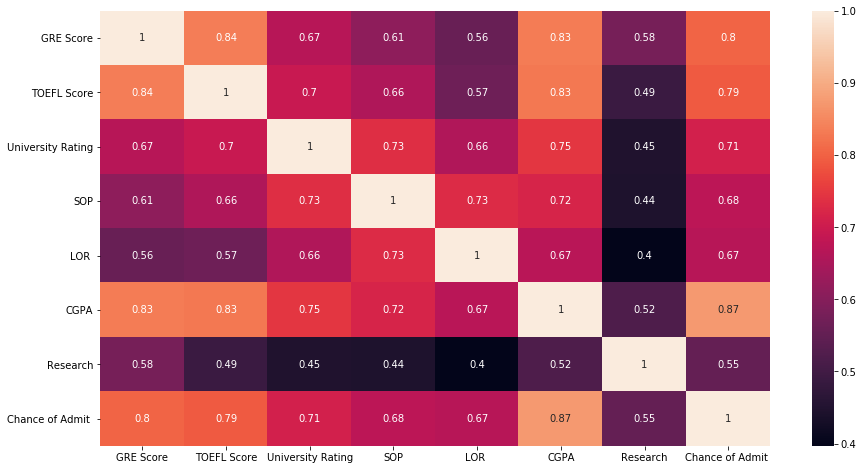

In [173]:
sns.heatmap(df_admission_correlation,annot=True)
plt.show()

In [174]:
np.linalg.det(df_admission_correlation.values) # Severe multicollinearity exists

0.0006481207424791461

### Check for non-multicollinear variables

In [281]:
df_numeric_features_vif = df_admission.select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1607.928316,GRE Score
1,1373.804681,TOEFL Score
2,1333.886926,CGPA
3,108.476950,Chance of Admit
4,39.774185,LOR
5,38.051007,SOP
6,22.998812,University Rating
7,3.211789,Research


In [282]:
for ind in range(len(df_numeric_features_vif.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    vif.sort_values("VIF_Factor",ascending=False)
    multi = vif[vif['VIF_Factor'] > 20]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor           Features
0   10.252752        TOEFL Score
1   12.063993  University Rating
2    2.759247           Research


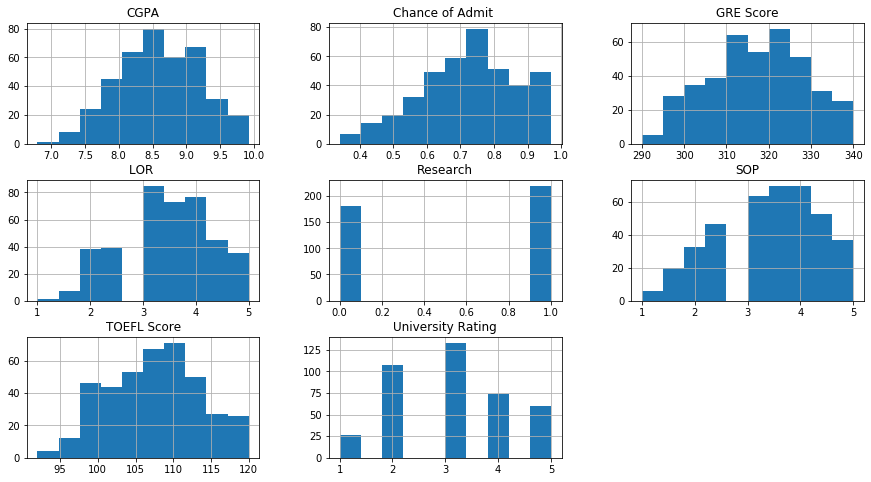

In [175]:
df_admission.hist()
plt.show()

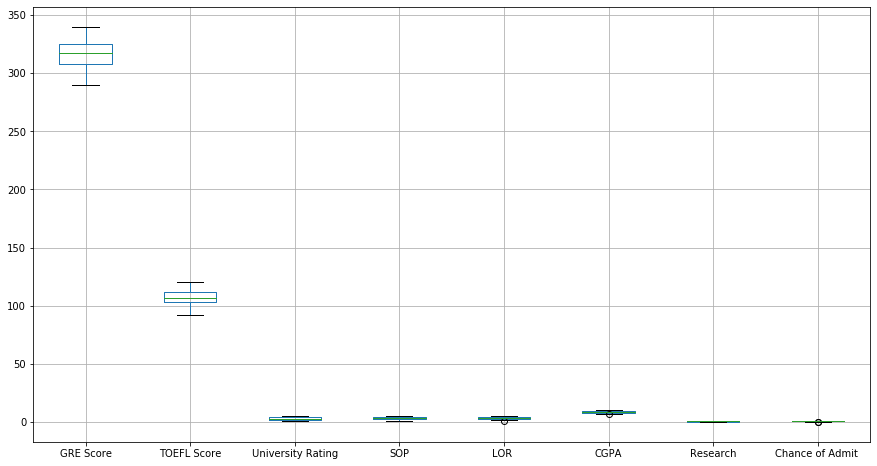

In [176]:
df_admission.boxplot()
plt.show()

In [177]:
df_admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

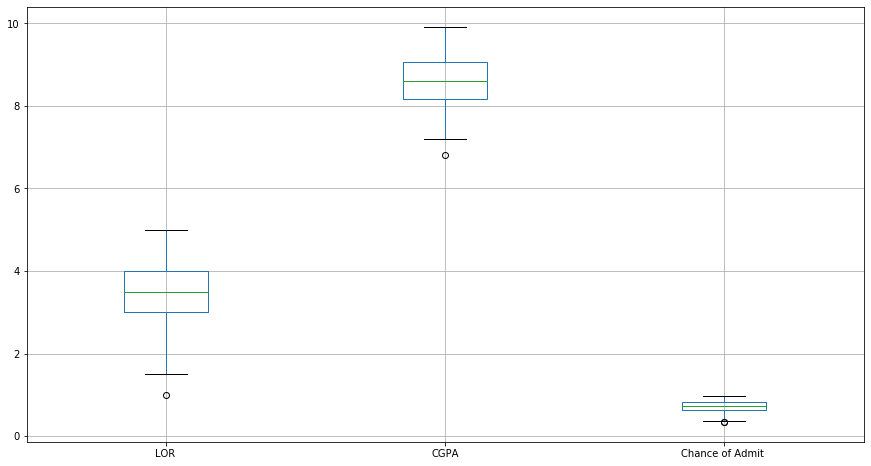

In [178]:
df_admission[['LOR ', 'CGPA','Chance of Admit ']].boxplot()
plt.show()

### No Outlier treatment is needed.

In [183]:
df_admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

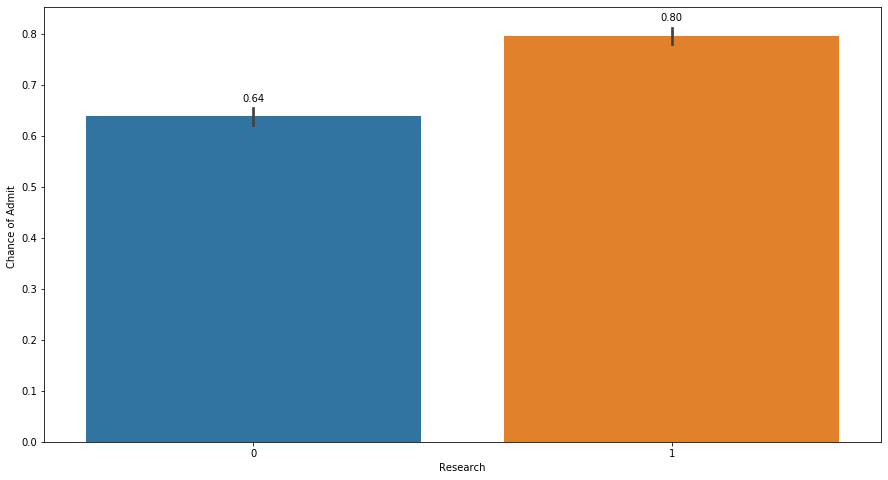

In [188]:
ax=sns.barplot(df_admission.Research,df_admission["Chance of Admit "])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.show()

# user defined functions to get the model performance scores

In [543]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(X_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

def get_score(model):
    r_sq = model.score(X_train, y_train)
    n = X_train.shape[0]
    k = X_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

score_card = pd.DataFrame(columns=['Model_Name', 'Alpha', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_RMSE','Test_RMSE', 'Test_MAPE'])
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model),
                       'Train_RMSE': get_train_rmse(model),
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)
    return score_card
    
def plot_coefficients(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

# Models

1. **[Simple full OLS model](#full)**
2. **[Simple full OLS model with rating and research as object](#full1)**
3. **[Model with the only non-multicollinear columns fron vif output](#full2)**
4. **[OLS full model with dependent log transformed](#full4)**
5. **[OLS full model with both X&y log transformed](#full5)**
6. **[Model with interaction effect between SOP and LOR](#full6)**
7. **[Model with interaction effect between SOP/LOR and GRE/TOEFL](#full7)**
8. **[OLS with Standardised and encoded variables](#full8)**
9. **[OLS with Normalised and encoded variables](#full9)**
10. **[Linear Regression using SGD](#full10)**

<a id="full"></a>
# 1) Simple full OLS model

In [544]:
X=df_admission.drop(columns=["Chance of Admit "])
X=sm.add_constant(X)
y=df_admission["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [545]:
full_ols=sm.OLS(y_train,X_train).fit()
print(full_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 20 Feb 2021   Prob (F-statistic):          4.99e-109
Time:                        08:59:32   Log-Likelihood:                 432.32
No. Observations:                 320   AIC:                            -848.6
Df Residuals:                     312   BIC:                            -818.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3226      0.14

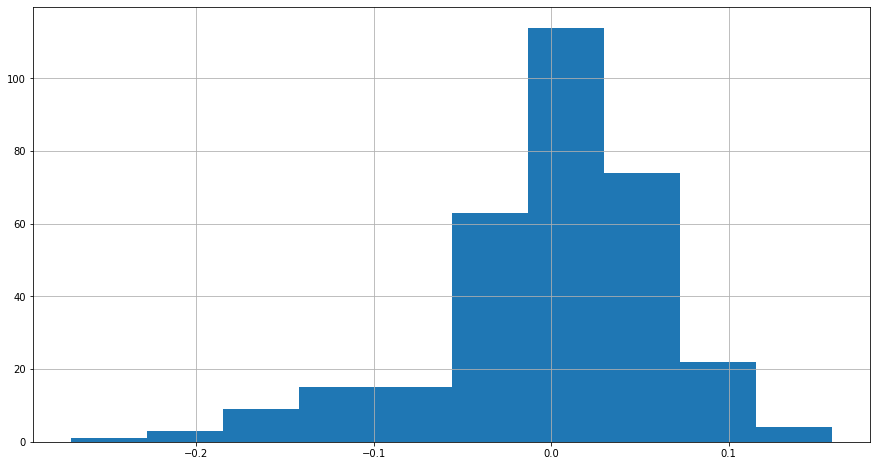

In [546]:
full_ols.resid.hist();plt.show()

### Inference for a Simple full OLS model:

##### 1) Model explaind 81.1% variance of the target variable "Chance of Admit".
##### 2) Durbin-Watson stat is < 2. There is autocorrelation in the data.
##### 3) The residual is left-skewed probably due to the target variable being left-skewed.
##### 4) Presence of severe multicollinearity.
##### 5) Insignificant Variables: University Rating, SOP, Research(pvalue>0.05).Keeping rating and research as int

In [547]:
linear_reg=LinearRegression()
full_linear_regression=linear_reg.fit(X_train, y_train)
update_score_card("Simple full OLS model",full_linear_regression)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081


### Checking for VIF of variables after performing object conversion of University Rating and Research

In [548]:
df=df_admission.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [549]:
df.Research.replace(to_replace=[1,0],value=["Research Completed","Research Not Completed"],inplace=True)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 28.1+ KB


In [551]:
df["University Rating"]=df["University Rating"].astype("object")

In [552]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,Research Completed,0.92
2,324,107,4,4.0,4.5,8.87,Research Completed,0.76
3,316,104,3,3.0,3.5,8.00,Research Completed,0.72
4,322,110,3,3.5,2.5,8.67,Research Completed,0.80
5,314,103,2,2.0,3.0,8.21,Research Not Completed,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,Research Completed,0.82
397,325,107,3,3.0,3.5,9.11,Research Completed,0.84
398,330,116,4,5.0,4.5,9.45,Research Completed,0.91


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    object 
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 28.1+ KB


In [554]:
df_numeric_features_vif = df.drop(columns="Chance of Admit ").select_dtypes(include=[np.number])
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
vif["Features"] = df_numeric_features_vif.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1324.789220,TOEFL Score
1,1307.834613,GRE Score
2,1014.666400,CGPA
3,37.154292,LOR
4,32.487842,SOP


In [555]:
for ind in range(len(df_numeric_features_vif.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    vif.sort_values("VIF_Factor",ascending=False)
    multi = vif[vif['VIF_Factor'] > 15]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor   Features
0   14.375738  GRE Score
1   14.375738        SOP


In [556]:
# Above are the non-multicollinear columns.

<a id="full1"></a>
# 2) Simple full OLS model with rating and research as object

In [557]:
a=df.drop(columns=["Chance of Admit ","Research","University Rating"])
dummy=pd.get_dummies(df[["Research","University Rating"]])
X=pd.concat([dummy,a],axis=1)
X=sm.add_constant(X)
y=df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

full_ols_research_rating_object=sm.OLS(y_train,X_train).fit()
print(full_ols_research_rating_object.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 20 Feb 2021   Prob (F-statistic):          4.54e-106
Time:                        08:59:32   Log-Likelihood:                 433.34
No. Observations:                 320   AIC:                            -844.7
Df Residuals:                     309   BIC:                            -803.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Inference for a Simple full OLS model with rating and research as object:

##### 1) Model explaind 81.3% variance of the target variable "Chance of Admit".
##### 2) Durbin-Watson stat is < 2. There is autocorrelation in the data.
##### 3) The residual is left-skewed probably due to the target variable being left-skewed.
##### 4) Presence of severe multicollinearity.
##### 5) significant Variables: University Rating, Research(pvalue<0.05).Keeping rating and research as object.

In [558]:
linear_reg=LinearRegression()
full_linear_regression_1=linear_reg.fit(X_train, y_train)
update_score_card("FUll OLS model with rating/research as object",full_linear_regression_1)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134


### Since the model having the reasearch and rating as object did not adversly affect the model performance, going forward we will consider those 2 columns as object.

<a id="full2"></a>
### 3) Model with the only non-multicollinear columns fron vif output. 

In [559]:
a=df[["GRE Score","SOP"]]
dummy=pd.get_dummies(df[["Research","University Rating"]])
X=pd.concat([dummy,a],axis=1)
X=sm.add_constant(X)
y=df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

full_ols_research_rating_object=sm.OLS(y_train,X_train).fit()
print(full_ols_research_rating_object.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           9.83e-84
Time:                        08:59:33   Log-Likelihood:                 372.30
No. Observations:                 320   AIC:                            -728.6
Df Residuals:                     312   BIC:                            -698.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [560]:
linear_reg=LinearRegression()
full_linear_regression_2=linear_reg.fit(X_train, y_train)
update_score_card("OLS model only with non-multicollinear varibales",full_linear_regression_2)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502


### Looks like the medel performance is reduced as there are only 2 numerical varibales.

<a id="full4"></a>
# 4) OLS full model with dependent log transformed

In [561]:
# Since the target variable is not normal, we can try transforming it into normal and look into model performance.

In [562]:
X=df_admission.drop(columns=["Chance of Admit "])
X=sm.add_constant(X)
y=np.log(df_admission["Chance of Admit "])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

full_ols_dependent_log=sm.OLS(y_train,X_train).fit()
print(full_ols_dependent_log.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           3.03e-90
Time:                        08:59:33   Log-Likelihood:                 255.84
No. Observations:                 320   AIC:                            -495.7
Df Residuals:                     312   BIC:                            -465.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.3714      0.24

In [563]:
linear_reg=LinearRegression()
full_linear_regression_3=linear_reg.fit(X_train, y_train)
update_score_card("OLS full model with dependent log transformed",full_linear_regression_3)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502
3,OLS full model with dependent log transformed,-,-,0.750962,0.744556,0.1088,0.1058,23.663697


### With the target variable being log transformed, we get reduced model performance. Not recommended to use.

<a id="full5"></a>
# 5) OLS full model with both X&y log transformed

In [564]:
# Since all the independent and target varibles are not normal, we can try using transformationa and see if it increases performance.

In [565]:
a=df_admission.drop(columns=["Chance of Admit ","Research","University Rating"])
b=np.log(a)
dummy=pd.get_dummies(df[["Research","University Rating"]])
X=pd.concat([dummy,b],axis=1)
X=sm.add_constant(X)
y=np.log(df_admission["Chance of Admit "])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

full_ols_both_log=sm.OLS(y_train,X_train).fit()
print(full_ols_both_log.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     96.50
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           7.45e-89
Time:                        08:59:33   Log-Likelihood:                 260.07
No. Observations:                 320   AIC:                            -498.1
Df Residuals:                     309   BIC:                            -456.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [566]:
linear_reg=LinearRegression()
full_linear_regression_4=linear_reg.fit(X_train, y_train)
update_score_card("OLS full model with both X&y log transformed",full_linear_regression_4)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502
3,OLS full model with dependent log transformed,-,-,0.750962,0.744556,0.1088,0.1058,23.663697
4,OLS full model with both X&y log transformed,-,-,0.757336,0.747026,0.1074,0.1050,21.826369


# With the target variable being log transformed, we get reduced model performance. Not recommended to use transformation on any of the variables.

<a id="full6"></a>
# 6) Model with interaction effect between SOP and LOR

In [567]:
df_admission["SOP_LOR"]=df_admission["SOP"]+df_admission["LOR "]
X=df_admission.drop(columns=["Chance of Admit "])
X=sm.add_constant(X)
y=df_admission["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
OLS_interaction=sm.OLS(y_train,X_train).fit()
print(OLS_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 20 Feb 2021   Prob (F-statistic):          4.99e-109
Time:                        08:59:33   Log-Likelihood:                 432.32
No. Observations:                 320   AIC:                            -848.6
Df Residuals:                     312   BIC:                            -818.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3226      0.14

<a id="full7"></a>
# 7) Model with interaction effect between SOP/LOR and GRE/TOEFL

In [568]:
linear_reg=LinearRegression()
full_linear_regression_5=linear_reg.fit(X_train, y_train)
update_score_card("Interaction MOdel between SOP and LOR",full_linear_regression_5)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502
3,OLS full model with dependent log transformed,-,-,0.750962,0.744556,0.1088,0.1058,23.663697
4,OLS full model with both X&y log transformed,-,-,0.757336,0.747026,0.1074,0.1050,21.826369
5,Interaction MOdel between SOP and LOR,-,-,0.811496,0.806023,0.0627,0.0662,7.047081


In [569]:
df_admission["SOP_LOR"]=df_admission["SOP"]+df_admission["LOR "]
df_admission["GRE_TOEFL"]=df_admission["GRE Score"]+df_admission["TOEFL Score"]
X=df_admission.drop(columns=["Chance of Admit "])
X=sm.add_constant(X)
y=df_admission["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
OLS_interaction=sm.OLS(y_train,X_train).fit()
print(OLS_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 20 Feb 2021   Prob (F-statistic):          4.99e-109
Time:                        08:59:33   Log-Likelihood:                 432.32
No. Observations:                 320   AIC:                            -848.6
Df Residuals:                     312   BIC:                            -818.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3226      0.14

In [570]:
linear_reg=LinearRegression()
full_linear_regression_6=linear_reg.fit(X_train, y_train)
update_score_card("Interaction between SOP/LOR & GRE/TOEFL",full_linear_regression_6)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502
3,OLS full model with dependent log transformed,-,-,0.750962,0.744556,0.1088,0.1058,23.663697
4,OLS full model with both X&y log transformed,-,-,0.757336,0.747026,0.1074,0.1050,21.826369
5,Interaction MOdel between SOP and LOR,-,-,0.811496,0.806023,0.0627,0.0662,7.047081
6,Interaction between SOP/LOR & GRE/TOEFL,-,-,0.811414,0.805311,0.0627,0.0662,7.049426


<a id="full8"></a>
# 8) OLS with Standardised and encoded variables

In [571]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [572]:
a=df.drop(columns=["Chance of Admit ","Research","University Rating","SOP"])
dummy=pd.get_dummies(df[["Research","University Rating"]])
sc=StandardScaler()
b=sc.fit_transform(a)
dfn1=pd.DataFrame(b,columns=a.columns,index=df.index)
X=pd.concat([dfn1,dummy],axis=1)
y=df["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
OLS_Scaled_std=sm.OLS(y_train,X_train).fit()
print(OLS_Scaled_std.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     149.1
Date:                Sat, 20 Feb 2021   Prob (F-statistic):          5.00e-107
Time:                        08:59:33   Log-Likelihood:                 433.00
No. Observations:                 320   AIC:                            -846.0
Df Residuals:                     310   BIC:                            -808.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
GRE Score 

In [573]:
linear_reg=LinearRegression()
full_linear_regression_7=linear_reg.fit(X_train, y_train)
update_score_card("OLS model with Standardisation",full_linear_regression_7)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502
3,OLS full model with dependent log transformed,-,-,0.750962,0.744556,0.1088,0.1058,23.663697
4,OLS full model with both X&y log transformed,-,-,0.757336,0.747026,0.1074,0.1050,21.826369
5,Interaction MOdel between SOP and LOR,-,-,0.811496,0.806023,0.0627,0.0662,7.047081
6,Interaction between SOP/LOR & GRE/TOEFL,-,-,0.811414,0.805311,0.0627,0.0662,7.049426
7,OLS model with Standardisation,-,-,0.812292,0.805588,0.0625,0.0655,7.048511


<a id="full9"></a>
# 9) OLS with Normalised and encoded variables

In [622]:
a=df.drop(columns=["Chance of Admit ","Research","University Rating","SOP"])
dummy=pd.get_dummies(df[["Research","University Rating"]])
mm=MinMaxScaler()
b=mm.fit_transform(a)
dfn1=pd.DataFrame(b,columns=a.columns,index=df.index)
X=pd.concat([dfn1,dummy],axis=1)
y=df["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
OLS_Scaled_normalise=sm.OLS(y_train,X_train).fit()
print(OLS_Scaled_normalise.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          5.00e-107
Time:                        08:28:29   Log-Likelihood:                 433.00
No. Observations:                 320   AIC:                            -846.0
Df Residuals:                     310   BIC:                            -808.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
GRE Score 

In [575]:
linear_reg=LinearRegression()
full_linear_regression_8=linear_reg.fit(X_train, y_train)
update_score_card("OLS model with NOrmalisation",full_linear_regression_8)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502
3,OLS full model with dependent log transformed,-,-,0.750962,0.744556,0.1088,0.1058,23.663697
4,OLS full model with both X&y log transformed,-,-,0.757336,0.747026,0.1074,0.1050,21.826369
5,Interaction MOdel between SOP and LOR,-,-,0.811496,0.806023,0.0627,0.0662,7.047081
6,Interaction between SOP/LOR & GRE/TOEFL,-,-,0.811414,0.805311,0.0627,0.0662,7.049426
7,OLS model with Standardisation,-,-,0.812292,0.805588,0.0625,0.0655,7.048511
8,OLS model with NOrmalisation,-,-,0.812292,0.805588,0.0625,0.0655,7.048511


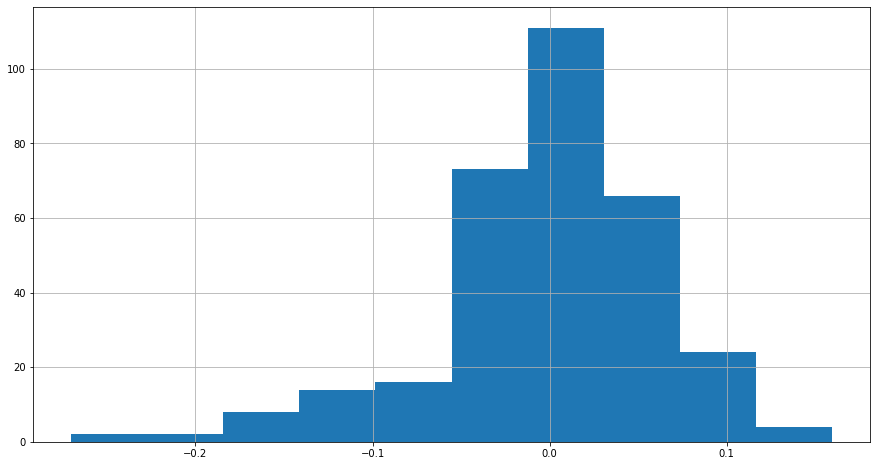

In [578]:
OLS_Scaled_normalise.resid.hist()
plt.show()

<a id="full10"></a>
# 10)Linear Regression using SGD

In [623]:
from sklearn.linear_model import SGDRegressor

linreg_with_SGD = SGDRegressor()
linreg_with_SGD = linreg_with_SGD.fit(X_train, y_train)
update_score_card("Linear Regression using SGD",linreg_with_SGD)

,Model_Name,Alpha,l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Simple full OLS model,-,-,0.811496,0.806647,0.0627,0.0662,7.047081
1,FUll OLS model with rating/research as object,-,-,0.812688,0.804730,0.0625,0.0657,7.028134
2,OLS model only with non-multicollinear varibales,-,-,0.725694,0.716817,0.0756,0.0758,8.308502
3,OLS full model with dependent log transformed,-,-,0.750962,0.744556,0.1088,0.1058,23.663697
4,OLS full model with both X&y log transformed,-,-,0.757336,0.747026,0.1074,0.1050,21.826369
5,Interaction MOdel between SOP and LOR,-,-,0.811496,0.806023,0.0627,0.0662,7.047081
6,Interaction between SOP/LOR & GRE/TOEFL,-,-,0.811414,0.805311,0.0627,0.0662,7.049426
7,OLS model with Standardisation,-,-,0.812292,0.805588,0.0625,0.0655,7.048511
8,OLS model with NOrmalisation,-,-,0.812292,0.805588,0.0625,0.0655,7.048511
9,Linear Regression using SGD,-,-,0.785359,0.777693,0.0669,0.0670,7.272000


# Cross Validation

In [ ]:
# Let us take the normalised data in point 8.

In [626]:
a=df.drop(columns=["Chance of Admit ","Research","University Rating","SOP"])
dummy=pd.get_dummies(df[["Research","University Rating"]])
mm=MinMaxScaler()
b=mm.fit_transform(a)
dfn1=pd.DataFrame(b,columns=a.columns,index=df.index)
X=pd.concat([dfn1,dummy],axis=1)
y=df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

### K-Fold Cross Validation

In [661]:
kf = KFold(n_splits = 5)

In [662]:
def Get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)                                   
    return model.score(X_test, y_test)                            

In [663]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [664]:
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.8955251802205476, 0.8098599745005333, 0.7034575452495702, 0.8667024843456677, 0.7735637685232154]

Minimum score obtained:  0.7035
Maximum score obtained:  0.8955
Average score obtained:  0.8098


# K-Fold Cross Validation using cross_val_score()

In [647]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [648]:
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.89552518 0.80985997 0.70345755 0.86670248 0.77356377]

Minimum score obtained:  0.7035
Maximum score obtained:  0.8955
Average score obtained:  0.8098


# Leave One Out Cross Validation (LOOCV)

In [651]:
loocv_rmse = []
loocv = LeaveOneOut()
for train_index, test_index in loocv.split(X_train):
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    linreg = LinearRegression()
    linreg.fit(X_train_l, y_train_l)
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    rmse = np.sqrt(mse)
    loocv_rmse.append(rmse)

In [652]:
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0
Maximum rmse obtained:  0.2768
Average rmse obtained:  0.0468


# Regularisation

In [601]:
a=df.drop(columns=["Chance of Admit ","Research","University Rating","SOP"])
dummy=pd.get_dummies(df[["Research","University Rating"]])
mm=MinMaxScaler()
b=mm.fit_transform(a)
dfn1=pd.DataFrame(b,columns=a.columns,index=df.index)
X=pd.concat([dfn1,dummy],axis=1)
y=df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(X_train, y_train)
print('RMSE on train set:', get_train_rmse(enet))
print('RMSE on test set:', get_test_rmse(enet))

RMSE on train set: 0.0794
RMSE on test set: 0.0735


In [616]:
a=df.drop(columns=["Chance of Admit ","Research","University Rating","SOP"])
dummy=pd.get_dummies(df[["Research","University Rating"]])
mm=MinMaxScaler()
b=mm.fit_transform(a)
dfn1=pd.DataFrame(b,columns=a.columns,index=df.index)
X=pd.concat([dfn1,dummy],axis=1)
y=df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5,6,7,8,9, 10, 20, 40, 60, 80, 100]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 100)
ridge_grid.fit(X_train, y_train)
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('RMSE on train set:', get_train_rmse(ridge_grid))
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 5} 

RMSE on train set: 0.0659
RMSE on test set: 0.0658


In [618]:
a=df.drop(columns=["Chance of Admit ","Research","University Rating","SOP"])
dummy=pd.get_dummies(df[["Research","University Rating"]])
mm=MinMaxScaler()
b=mm.fit_transform(a)
dfn1=pd.DataFrame(b,columns=a.columns,index=df.index)
X=pd.concat([dfn1,dummy],axis=1)
y=df["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 100)
lasso_grid.fit(X_train, y_train)
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on train set:', get_train_rmse(lasso_grid))
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-08} 

RMSE on train set: 0.0625
RMSE on test set: 0.0655
